# Project 3 - Insurance  Cost Prediction

# Problem Statement
*  Prepare the data, identifying and extracting key features (both input and output
parameters) relevant to the problem you will solve.
*  Build and train a machine learning model. Here you can evaluate different
algorithms, settings and see which model is best for your scenario.

# AIM
● Create a machine learning model to predict the insurance price charged to the
customer. The charge depends on various features such as age, type of coverage,
amount of coverage needed, gender, body mass index (BMI), region, and other special
factors like smoking to determine what health risks the person possesses.

# 1. Import Libraries

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [130]:
data=pd.read_csv("datasets_13720_18513_insurance(1).csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3. Domain Analysis
 **In order to make their profit, insurance companies must collect a higher premium than the amount which may become due to the insured person. To achieve this, insurance companies invest a lot of time, effort, and money in creating models that accurately predict healthcare expenses.**
#### Columns
- **age:** age of primary beneficiary
- **sex:** beneficiary’s gender - female or male
- **bmi:** Body mass index, providing an understanding of body, weights that arerelatively high or low relative to height, objective index of body weight (kg / m ^2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking or non-smoking
* **region:** the beneficiary's residential area in the US; northeast, southeast,southwest, northwest.
* **charges:** Individual medical costs billed by health insurance (to be predicted)

# 2. Basic checks

In [131]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [133]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [134]:
data.shape

(1338, 7)

In [135]:
# Datatype 
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [136]:
# Null Value 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [138]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [139]:
data.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [140]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [141]:
data1=data[['sex','children', 'smoker', 'region']]

In [142]:
data2=data[['age','bmi','charges']]

In [143]:
for i in data1 :
    print(i,data[i].unique())
    print(i,data[i].value_counts())
    print("**************************")

sex ['female' 'male']
sex male      676
female    662
Name: sex, dtype: int64
**************************
children [0 1 3 2 5 4]
children 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
**************************
smoker ['yes' 'no']
smoker no     1064
yes     274
Name: smoker, dtype: int64
**************************
region ['southwest' 'southeast' 'northwest' 'northeast']
region southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
**************************


# Insights
* This dataset contains 1338 rows and 7 columns.
* Data types of columns are either int, float or object
* There is no null value in this dataset.
* In this dataset there is no constant feature.
* Average insaurance price charged to customer is 13270
* Our target variable is charges and its continous.

# 4. EDA (Exploratory Data Analysis)
## ● Univariate Analysis

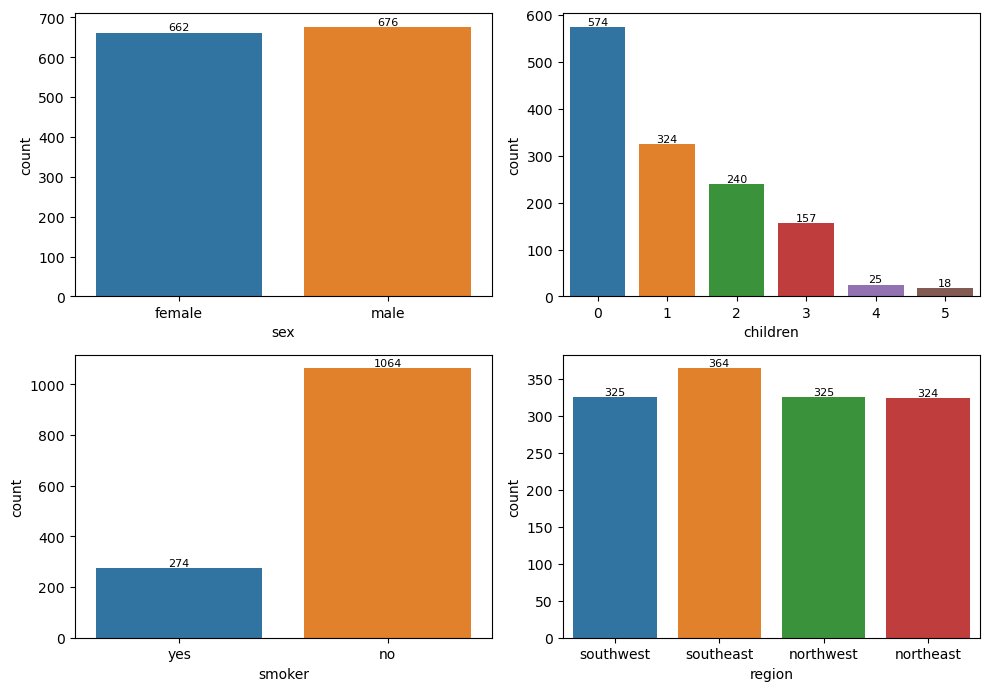

In [144]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in data1:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        count=sns.countplot(x=data1[column])
        for bars in count.containers:
            count.bar_label(bars,fontsize=8)
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

## Insights
* **Sex =** no. of male are 676 and no. of female are 662. it is somewhere equal.
* **Children =** customer who do no have any children are 574 and having one children are 324, having two children are 240, having  three children are 157, having 4 children are 24 and having five children are 18. this plot shows that when the no of children increases the frequency decreases.
* **Smoker =** customer who smokes are 274 and customer who don't smoke are 1064. very less no of customer smoking and the customer who are not smoking are more.
* **Region =** more no of customer are from southeast region and from southwest, northwest, northeast are equal in number.

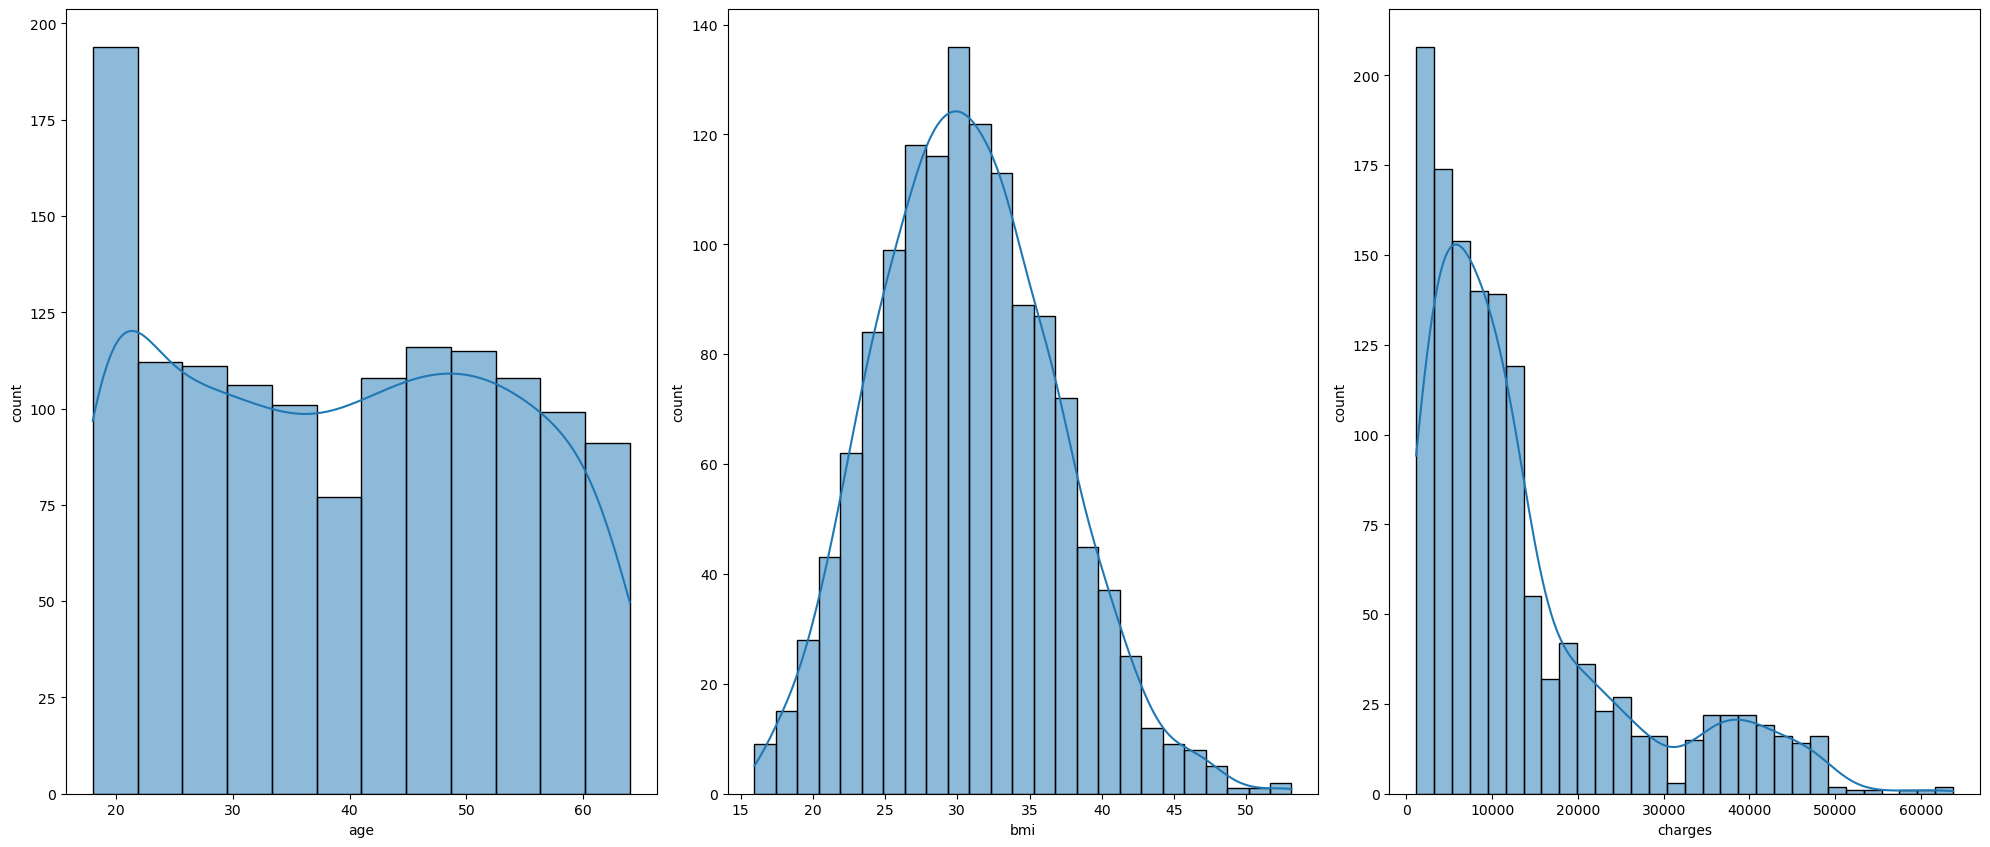

In [145]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data2:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data2[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

## Insights
* **Age =** The distribution of age is sqewed. The age of customer is between 20 to 60 year,and more no of customers are of 20 year of age and the customer whose age is 60 or above are very less.
* **BMI =** BMI is representing normal distribution. customers BMI are between 15 to 50 and the customer whose BMI is between 25 to 35 are more.
* **charges =** Its sqewed distribution when the charges increases the frequency decreases. charges from 0 to 10000 is very high and charges from 50000 to 60000 is very less.

## ● By-Variate Analysis

<Axes: xlabel='age', ylabel='charges'>

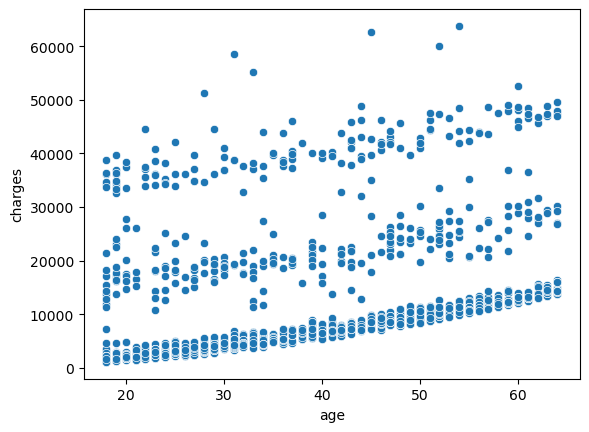

In [146]:
sns.scatterplot(x='age',y='charges',data=data)

### Insights
* This column shows that the customer whose age is more they get high amount of insaurance money and customer whose age is lesser they got less amount.
* when age is increases the amount of chargers is also increaes.
* There is positive relationship between charges and Sales.

<Axes: xlabel='sex', ylabel='charges'>

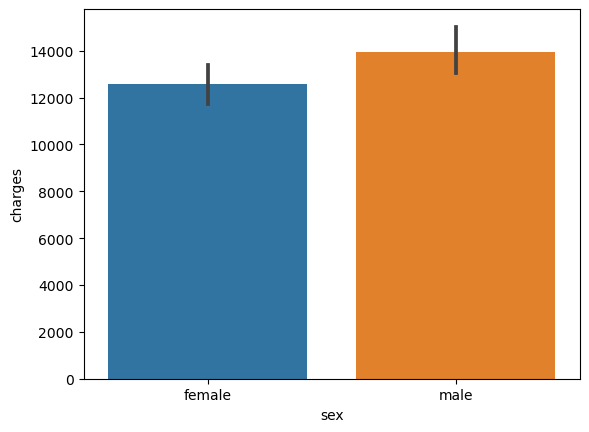

In [147]:
sns.barplot(x='sex',y='charges',data=data)

### Insights 
* The male customer got high amount of charges as compare to female.

<Axes: xlabel='bmi', ylabel='charges'>

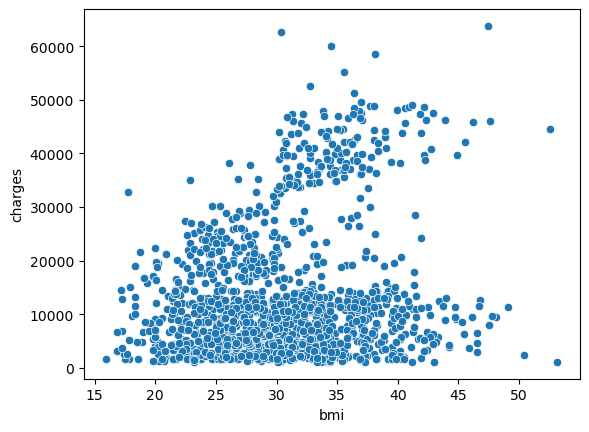

In [148]:
sns.scatterplot(x='bmi',y='charges',data=data)

### Insights
* Customer whose body mass index is between 15 to 25 they got charges amount upto 30000, and customer whose BMI is 30 to 40 they got high amount of charges upto 60000.
* There is no much trend or strong relationship betweeen charges and BMI.

<Axes: xlabel='children', ylabel='charges'>

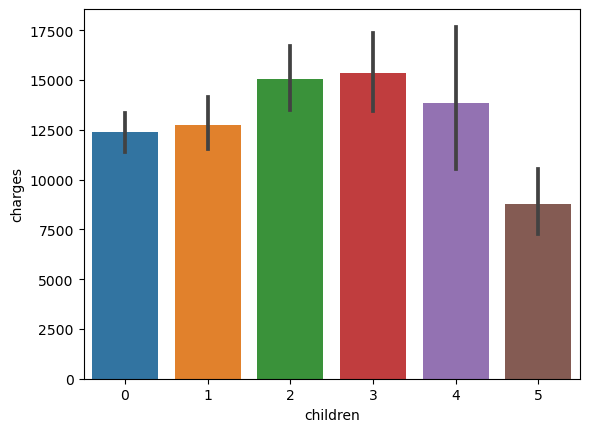

In [149]:
sns.barplot(x='children',y='charges',data=data)

### Insights
* The customer who have 3 children has got high  amount of charges and the customer who have 5 children can get very less amount of charges as compare to customer who have less children.

<Axes: xlabel='region', ylabel='charges'>

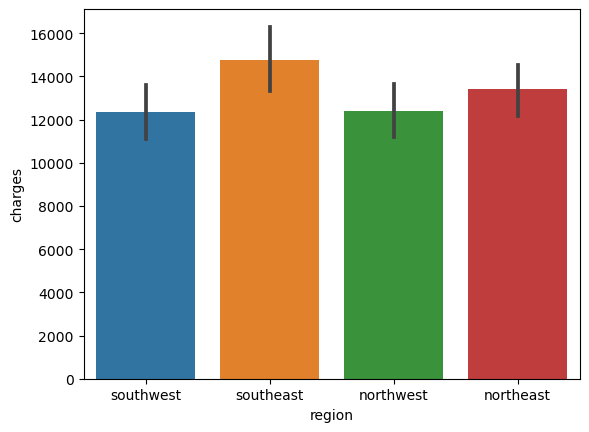

In [150]:
sns.barplot(x='region',y='charges',data=data)

### Insights 
* Above bar plot shows that customers who are from southeast region can get high amount of charges and the customer who is located from southwest region they got very less amount of charges as compare to all other region.

<Axes: xlabel='smoker', ylabel='charges'>

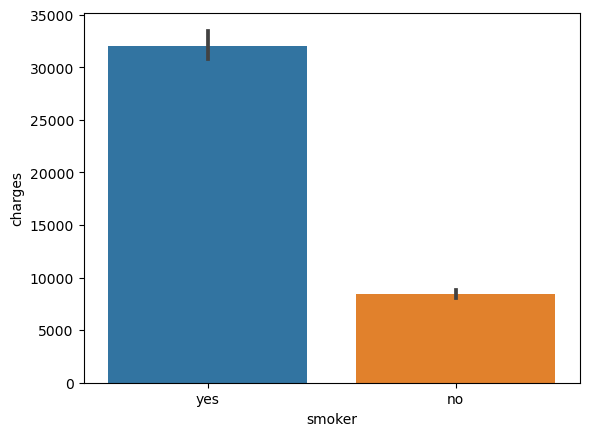

In [151]:
sns.barplot(x='smoker',y='charges',data=data)

### Insights
* The customer who smokes can get high amount of charges upto 32000 and the customer who do not smoke can get less amount upto 10000 only. 

## ● Multivariate Analysis

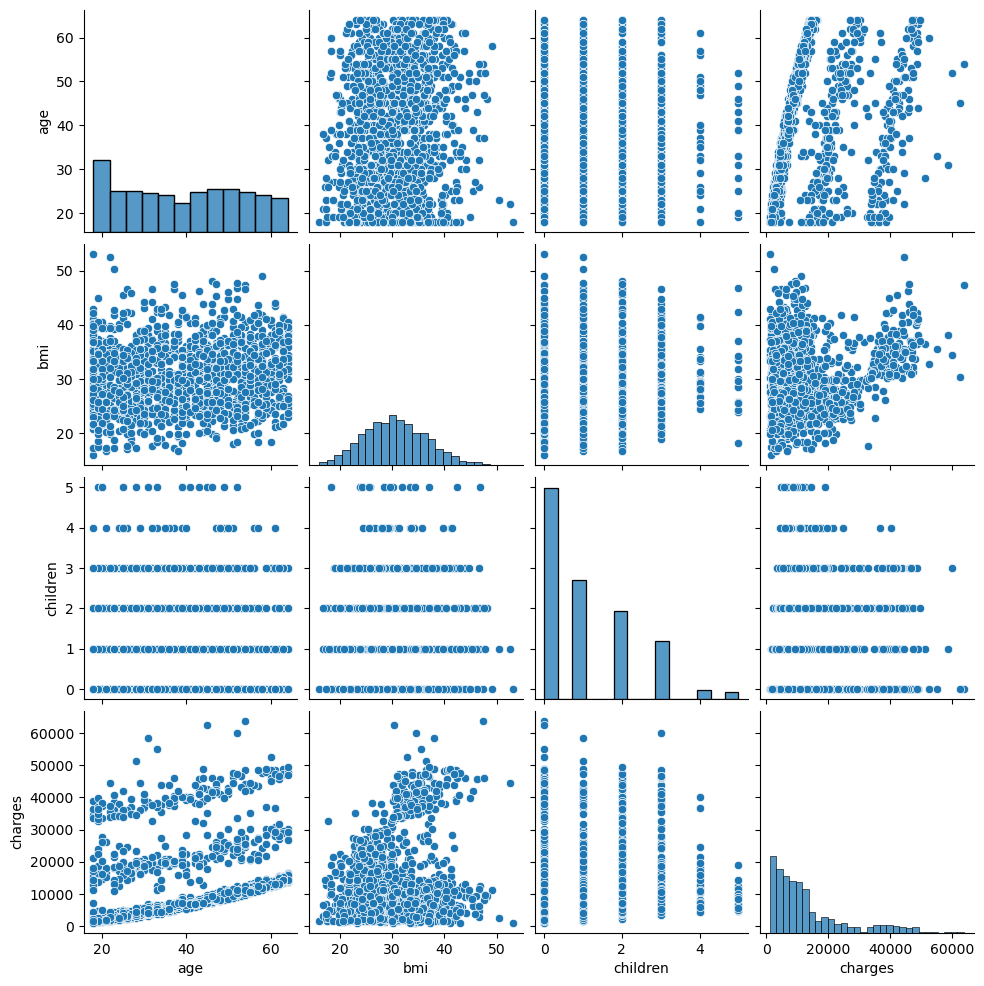

In [152]:
sns.pairplot(data)

# 5. Data Preprocessing 

## ● Null Value

In [153]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**There is no null value in our dataset.**

## ● Duplicate

In [154]:
data.duplicated().sum()

1

In [155]:
# there is duplicate value in dataset so we can drop this value.
data.drop_duplicates(inplace=True)

## ● Outlier

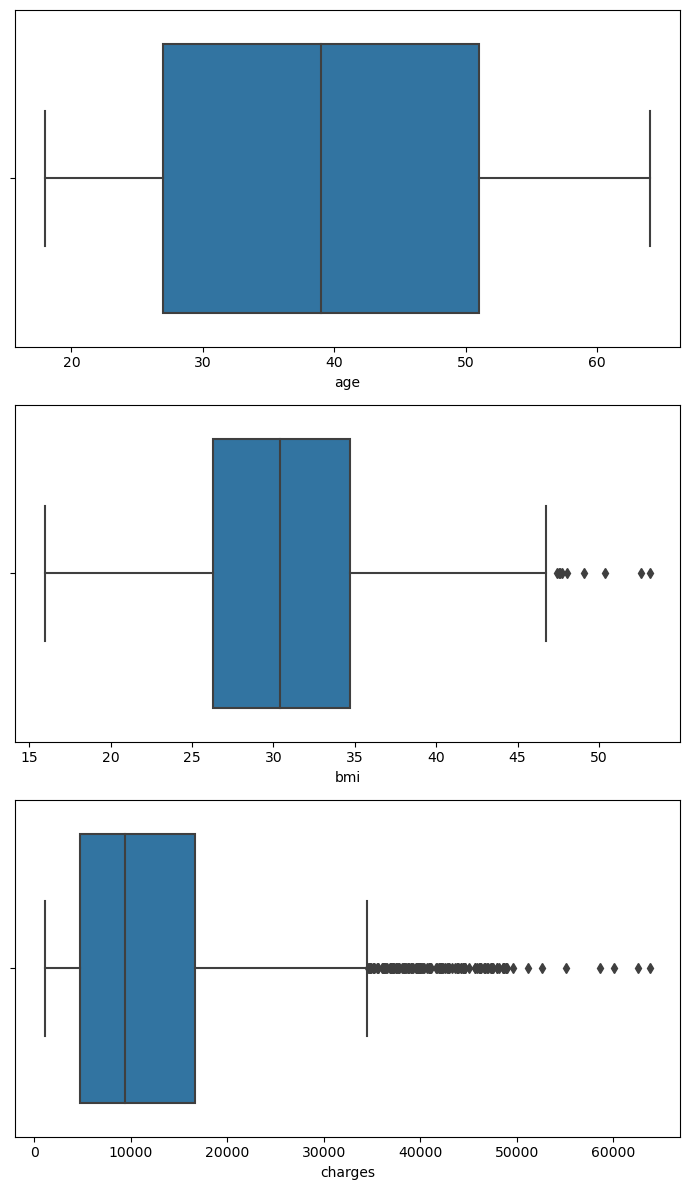

In [156]:
plt.figure(figsize=(7,12))
plotnumber=1

for column in data2:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

### BMI

<Axes: xlabel='bmi', ylabel='Count'>

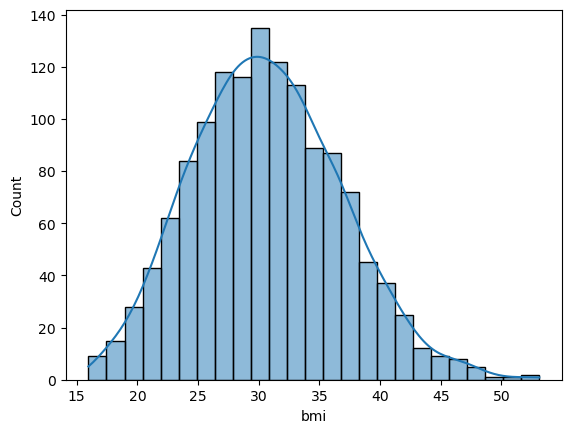

In [157]:
sns.histplot(x=data.bmi,kde=True)

### 3 sigma method 

In [158]:
lower_limit=data.bmi.mean() - 3*data.bmi.std()
print(lower_limit)

upper_limit=data.bmi.mean() + 3*data.bmi.std()
print(upper_limit)

12.362046528819015
48.96485698651382


In [159]:
data.loc[data['bmi']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [160]:
data.loc[data['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [161]:
data.loc[data['bmi']>upper_limit,'bmi']=np.mean(data.bmi)

In [162]:
data.loc[data['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges


<Axes: xlabel='bmi'>

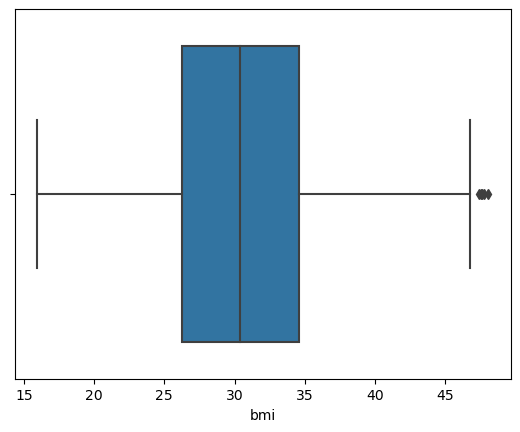

In [163]:
sns.boxplot(x=data.bmi)

## ● Encoding 

In [164]:
data.describe(include="O")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


#### ● Sex 
* its nominal data it dont have any order  if we do label encoding and it assign value on the basis of letter. if higher value in male model give importance to that.

In [165]:
data.sex=pd.get_dummies(data.sex,drop_first=True)

#### ● Smoker

In [166]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.smoker=lc.fit_transform(data.smoker)

#### ● Region 
*   its nominal feature because it do not has any order.

In [167]:
data = pd.get_dummies(data, columns=['region'])

In [168]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## ● Scalling 

In [169]:
data.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.601749,1.095737,0.204936,13279.121487,0.242334,0.242334,0.272251,0.243082
std,14.044333,0.500163,5.994187,1.205571,0.403806,12110.359656,0.428655,0.428655,0.445285,0.429104
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.580000,2.000000,0.000000,16657.717450,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,48.070000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [170]:
from sklearn.preprocessing import MinMaxScaler
scalling=MinMaxScaler()
data[['age','bmi']]=scalling.fit_transform(data[['age','bmi']])

In [171]:
data.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.461351,0.504862,0.455987,1.095737,0.204936,13279.121487,0.242334,0.242334,0.272251,0.243082
std,0.305312,0.500163,0.186677,1.205571,0.403806,12110.359656,0.428655,0.428655,0.445285,0.429104
min,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.321707,0.000000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.449704,1.000000,0.000000,9386.161300,0.000000,0.000000,0.000000,0.000000
75%,0.717391,1.000000,0.579882,2.000000,0.000000,16657.717450,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


# 6. Feature Enginering 

In [172]:
data_corr=data[['age','bmi','children','charges']]

In [173]:
data_corr.corr()

,age,bmi,children,charges
age,1.000000,0.118650,0.041536,0.298308
bmi,0.118650,1.000000,0.018031,0.200234
children,0.041536,0.018031,1.000000,0.067389
charges,0.298308,0.200234,0.067389,1.000000


<Axes: >

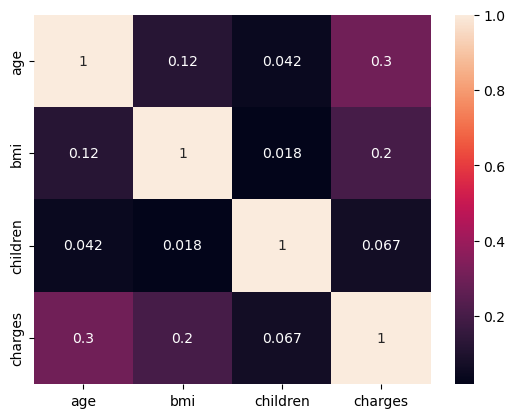

In [174]:
# Checking correlation of numerical column 
sns.heatmap(data_corr.corr(),annot=True)

**There is no high correlation between input variable so we can't drop any column.**

# Splitting 

In [175]:
x=data.drop("charges",axis=1)
y=data[['charges']]

In [176]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.371847,0,1,0,0,0,1
1,0.000000,1,0.554656,1,0,0,0,1,0
2,0.217391,1,0.530676,3,0,0,0,1,0
3,0.326087,1,0.210059,0,0,0,1,0,0
4,0.304348,1,0.402367,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.467456,3,0,0,1,0,0
1334,0.000000,0,0.497041,0,0,1,0,0,0
1335,0.000000,0,0.650576,0,0,0,0,1,0
1336,0.065217,0,0.306447,0,0,0,0,0,1


In [177]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [179]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (1069, 9)
x_test: (268, 9)
y_train: (1069, 1)
y_test: (268, 1)


# Model Creation

## 1. Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [181]:
y_pred=model1.predict(x_test)

In [228]:
from sklearn.metrics import f1_score,r2_score,mean_squared_error,mean_absolute_error

In [253]:
LR=r2_score(y_test,y_pred)
LR

0.8006497947704224

In [184]:
df=y_test.copy()

In [185]:
df['y_pred']=y_pred

In [186]:
df

,charges,y_pred
694,3577.99900,6756.396335
1296,1708.92575,1655.685710
1144,9630.39700,11773.990691
904,12644.58900,14362.559856
840,1526.31200,3176.356455
...,...,...
1105,10338.93160,11334.265272
1204,18223.45120,26427.424473
512,9361.32680,8371.038668
1077,2102.26470,2353.035956


In [187]:
import math
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error

5470.973299589558


In [188]:
print(mean_absolute_error(y_test,y_pred))

3904.5978725981727


## 2. SVM 

In [190]:
from sklearn.svm import SVR
model2=SVR()
model2.fit(x_train,y_train)

SVR()

In [191]:
y_pred2=model2.predict(x_test)

In [254]:
SVR=r2_score(y_test,y_pred2)
SVR

-0.11143383780091987

In [193]:
print(math.sqrt(mean_squared_error(y_test,y_pred2)))

12918.08265854129


In [194]:
mean_absolute_error(y_test,y_pred2)

8149.032031920252

## 3. Decision Tree

In [195]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(x_train,y_train)

DecisionTreeRegressor()

In [196]:
y_pred3=model3.predict(x_test)

In [197]:
DT=r2_score(y_test,y_pred3)
DT

0.7176918510047319

In [198]:
print(math.sqrt(mean_squared_error(y_test,y_pred3)))

6510.554203459053


In [199]:
mean_absolute_error(y_test,y_pred3)

3245.7597549216416

# 4. Random Forest

In [200]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor(n_estimators=50)
model4.fit(x_train,y_train)
# Estimator means model estimator=100 means 100 DT
# Paralely

RandomForestRegressor(n_estimators=50)

In [201]:
y_pred4=model4.predict(x_test)

In [256]:
rf=r2_score(y_test,y_pred4)
rf

0.88407960339326

In [203]:
print(math.sqrt(mean_squared_error(y_test,y_pred4)))

4171.922007746449


In [204]:
mean_absolute_error(y_test,y_pred4)

2379.665648936194

### Hyper Parameter

In [200]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500, num=15)] 
max_features = ['auto', 'sqrt', 'log2']  
max_depth = [int(x) for x in np.linspace(5, 100, num=20)] + [None]  
min_samples_split = [2, 4, 6, 10] 
min_samples_leaf = [1, 2, 4, 6]  

In [201]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [202]:
rf_hp = RandomForestRegressor(random_state=42)


In [203]:
hp = RandomizedSearchCV(estimator=rf_hp, scoring='r2', param_distributions=random_grid, n_iter=100, cv=5, verbose=3, random_state=42, n_jobs=-1)


In [204]:
hp.fit(x_train,y_train)
rf_best_params = hp.best_params_
print(f"Best Parameters: {rf_best_params})")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 5})


In [205]:
model4_hp=RandomForestRegressor(n_estimators= 1000, min_samples_split = 2, min_samples_leaf= 6, max_features = 'auto', max_depth= 5)
model4_hp.fit(x_train,y_train)
y_pred4hp=(model4_hp.predict(x_test))

In [257]:
RF=r2_score(y_test,y_pred4hp)
RF

0.9046670678645596

## 5. Grandient Boosting 

In [211]:
from sklearn.ensemble import GradientBoostingRegressor
model5=GradientBoostingRegressor()
model5.fit(x_train,y_train)

GradientBoostingRegressor()

In [213]:
y_pred5=model5.predict(x_test)

In [259]:
GB=r2_score(y_test,y_pred5)
GB

0.900219692779245

In [223]:
# Training Score
y_train_p=model5.predict(x_train)

In [224]:
train=r2_score(y_train,y_train_p)
train

1.0

In [225]:
math.sqrt(mean_squared_error(y_test,y_pred5))

3870.6033673354405

In [229]:
mean_absolute_error(y_test,y_pred5)

2204.1577354826054

# 6. XG - Boost

In [230]:
from xgboost import XGBRegressor
model6=XGBRegressor()
model6.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [232]:
y_pred6=model6.predict(x_test)

In [261]:
XGB=r2_score(y_test,y_pred6)
XGB

0.9039909127426697

In [234]:
math.sqrt(mean_squared_error(y_test,y_pred6))

3796.753676727562

In [235]:
mean_absolute_error(y_test,y_pred6)

2190.3461959101564

In [238]:
# Training Score
y_train_pred=model6.predict(x_train)

In [239]:
r2_score(y_train,y_train_pred)

0.9999732431664536

## Hyperparameter Tunning

In [248]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=3000, num=30)]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
learning_rate=[0.01, 0.05, 0.1, 0.2, 0.3]
gamma=[0, 0.5, 1, 1.5, 2, 3, 4, 5]
subsample=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
reg_alpha = [0, 0.1, 0.5, 1, 10]
reg_lambda = [1, 1.5, 2, 3, 4.5]

params={
    'n_estimators':n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate,'gamma':gamma, 'subsample':subsample,
    'colsample_bytree':colsample_bytree, 'reg_alpha':reg_alpha, 'reg_lambda':reg_lambda
}

XGB=XGBRegressor(random_state=42)
hp_model=RandomizedSearchCV(XGB, scoring='r2', param_distributions=params, n_iter=150, cv=5, random_state=42, n_jobs=-1, verbose=2)

In [249]:
hp_model.fit(x_train,y_train)
cv_best_params = hp_model.best_params_
print(f"best paramaters: {cv_best_params}")

Fitting 5 folds for each of 150 candidates, totalling 750 fits
best paramaters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 1.5, 'colsample_bytree': 1.0}


In [251]:
hp_model6=XGBRegressor(subsample= 0.9, reg_lambda= 2, reg_alpha= 0.1, n_estimators= 900, max_depth= 4, learning_rate= 0.3, gamma= 1.5, colsample_bytree= 1.0)
hp_model6.fit(x_train,y_train)
y_preg6hp=hp_model6.predict(x_test)

In [252]:
r2_score(y_test,y_preg6hp)     

0.9027762051223662

# Scores

In [286]:
scores=[SVR,DT,LR,RF,GB,XGB]
algorithms=['SVR','DecisionTree','LinearRegression','RandomForest','GradientBoosting','XGBoost']
for i in range(len(algorithms)):
    print(algorithms[i] +" = " +str(scores[i])+"%.")

SVR = -0.11143383780091987%.
DecisionTree = 0.7176918510047319%.
LinearRegression = 0.8006497947704224%.
RandomForest = 0.9046670678645596%.
GradientBoosting = 0.900219692779245%.
XGBoost = 0.9039909127426697%.


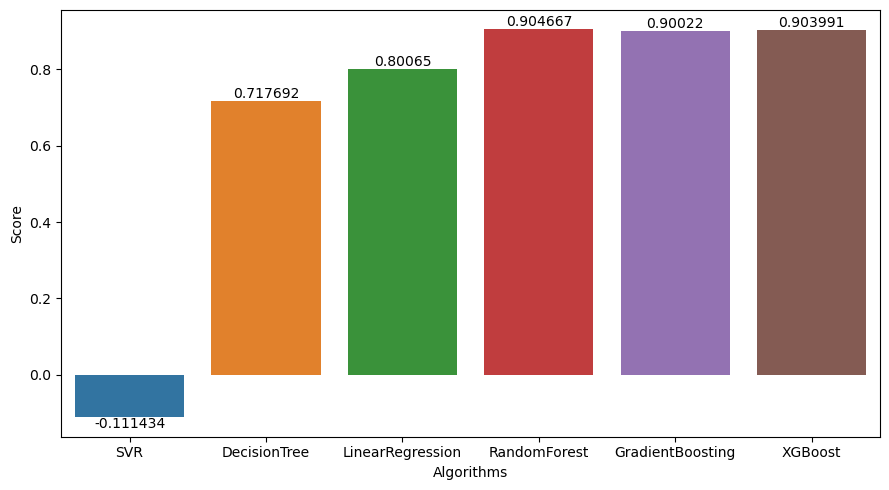

In [287]:
#Barplot
plt.figure(figsize=(9,5))
plt.xlabel("Algorithms")
plt.ylabel("Score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks()
plt.tight_layout()
plt.tick_params(labelsize=10)